# Lasso Regression
#### Lasso Regression is a type of regularized linear regression that adds an L1 penalty to the cost function.

#### It is also called:
#### L1 Regularization

---

## Important:
<ul>
    <li>Lasso can force coefficients exactly to zero</li>
    <li>This means it performs feature selection</li>
</ul>

---

## Full form:
#### Least Absolute Shrinkage and Selection Operator

---

## Why Do We Need Lasso?
#### In ordinary Linear Regression:
<ul>
    <li>Model may overfit</li>
    <li>Coefficients can become very large</li>
    <li>Multicollinearity causes instability</li>
</ul>

#### Lasso helps by:
<ul>
    <li>Shrinking coefficients</li>
    <li>Performing automatic feature selection</li>
</ul>

---

## Cost Function of Lasso Regression
#### ```J(β) = ∑(y​−y^​​)^2 + λ.∑∣β​∣ ```
#### Where:
<ul>
    <li>First term → Sum of Squared Errors</li>
    <li>Second term → L1 penalty</li>
    <li>λ → Regularization parameter</li>
    <li>|β| → Absolute value of coefficients</li>
</ul>

## Role of Lambda (λ)
#### Lambda controls the strength of penalty.

---

## Why Does Lasso Create Sparsity?

### First: What Does “Sparsity” Mean?
#### Sparsity means: Many coefficients become exactly zero.
#### So the model uses only a few important features.

## Geometric Intuition (Most Important Part)
#### 🔵 Ridge → Circular Constraint
#### 🔶 Lasso → Diamond Constraint
#### Let’s visualize this.
### Ridge (L2 Constraint Shape)
<ul>
    <li>Constraint region is circular</li>
    <li>Smooth edges</li>
    <li>
        When loss contour touches circle:
        <ul>
        <li>Rarely happens exactly on axis</li>
        <li>So coefficients shrink but don’t become zero</li>
        </ul>
    </li>
</ul>

### Lasso (L1 Constraint Shape)
<ul>
    <li>Constraint region is a diamond</li>
    <li>Sharp corners on axes</li>
    <li>Loss contour often touches at corners</li>
    <li>Corners lie on axes → one coefficient = 0</li>
</ul>

#### That’s why Lasso creates sparsity.

## Mathematical Reason (Optimization View)
#### The L1 penalty: ∣β∣
#### is not differentiable at 0.

#### That sharp corner at 0 makes optimization prefer exact zeros.
#### Ridge’s penalty: 𝛽^2
#### is smooth everywhere → it gently shrinks but doesn’t kill coefficients.
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

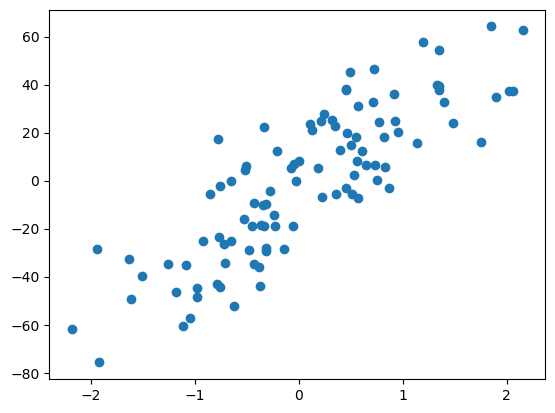

In [4]:
plt.scatter(X, y)

In [5]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[28.07637482]
-3.5542386451751105


/tmp/ipykernel_71003/15920687.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
/home/coderashim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/coderashim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+04, tolerance: 8.622e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


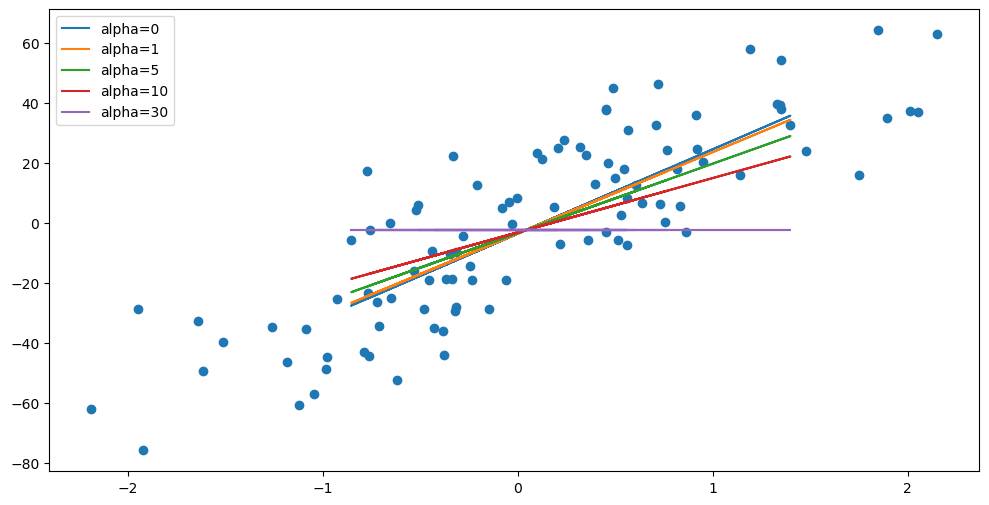

In [9]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()